# Imports

In [3]:
# Imports

## Standard
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Statistical Analysis
from itertools import permutations, combinations
from scipy import stats

# Data

In [2]:
# Loading in the data

csv_path = '/home/clachris/Documents/projects/Cervical_Cancer_Projects/predictions/test_dr/predictions.csv'
df_dr = pd.read_csv(csv_path)
df_dr.head()

,Unnamed: 0,NCI_PID,MASKED_IMG_ID,q1_use,q1_eval,raw_via,image_datetime,IQ_label,x1,x2,...,mc_epistemic_45,mc_epistemic_46,mc_epistemic_47,mc_epistemic_48,mc_epistemic_49,pred_mc,predicted_mc_class,soft_mc_prediction,predicted_class,soft_prediction
0,0,302-1103,DOM 000037 004.jpeg,1,3,Pre-VIA,25JAN2023:11:02:02.837,2,138,1653,...,"[0.012664076872169971, 0.9783763885498047, 0.0...","[0.456440269947052, 0.5354125499725342, 0.0081...","[0.030779169872403145, 0.9655184745788574, 0.0...","[0.00591505691409111, 0.9067081212997437, 0.08...","[0.0005850227898918092, 0.9976123571395874, 0....","[0.22065209296968533, 0.740043742256239, 0.039...",1,0.818652,0,0.497349
1,1,302-1067,DOM 000025 005.jpeg,1,2,VIA60,11JAN2023:11:38:19.895,1,152,1420,...,"[0.004920217674225569, 0.8141694068908691, 0.1...","[0.15967459976673126, 0.7754160165786743, 0.06...","[0.05327724292874336, 0.8723088502883911, 0.07...","[0.03351810202002525, 0.8252186179161072, 0.14...","[0.02170724608004093, 0.5335841774940491, 0.44...","[0.07549948585656238, 0.759624417424202, 0.164...",1,1.089377,1,1.142637
2,2,302-1041,DOM 000015 010.jpeg,1,2,VIA60,18JAN2023:11:06:27.775,1,235,1620,...,"[0.005617274437099695, 0.9661752581596375, 0.0...","[0.029859786853194237, 0.9512759447097778, 0.0...","[0.012147991918027401, 0.9682629704475403, 0.0...","[0.023265967145562172, 0.9628340601921082, 0.0...","[0.0015260449144989252, 0.992420494556427, 0.0...","[0.0260475369769847, 0.9485517954826355, 0.025...",1,0.999353,1,0.979470
3,3,302-1017,DOM 000006 006.jpeg,1,3,VIA60,05JAN2023:14:37:45.902,2,425,1726,...,"[0.02326062321662903, 0.9551858305931091, 0.02...","[0.0013609665911644697, 0.9952474236488342, 0....","[0.0036077883560210466, 0.9769758582115173, 0....","[0.017908120527863503, 0.9765793085098267, 0.0...","[0.8872201442718506, 0.11167874932289124, 0.00...","[0.08258596062252764, 0.9006099128723144, 0.01...",1,0.934218,1,0.901226
4,4,302-1084,DOM 000031 006.jpeg,1,3,Pre-VIA,16JAN2023:11:58:38.433,2,475,1492,...,"[0.0017573770601302385, 0.9388651251792908, 0....","[0.095090851187706, 0.8924920558929443, 0.0124...","[0.5091769695281982, 0.48976388573646545, 0.00...","[0.022955335676670074, 0.9662797451019287, 0.0...","[0.18821918964385986, 0.7998198866844177, 0.01...","[0.16037062913383124, 0.7995462957769632, 0.04...",1,0.879712,1,0.971063


In [3]:
# Loading in the data

csv_path = '/home/clachris/Documents/projects/Cervical_Cancer_Projects/predictions/test_cambodia/predictions.csv'
df_cam = pd.read_csv(csv_path)
df_cam.head()

,Unnamed: 0,NCI_PID,image,label,dataset,x1,y1,x2,y2,raw_via,...,mc_epistemic_45,mc_epistemic_46,mc_epistemic_47,mc_epistemic_48,mc_epistemic_49,pred_mc,predicted_mc_class,soft_mc_prediction,predicted_class,soft_prediction
0,0,PID 07-00001,MSK 000001 001.jpeg,NaN,test,83,154,1349,1686,Pre-VIA,...,"[1.50635960380896e-05, 0.16964085400104523, 0....","[5.12973711011e-05, 0.13688422739505768, 0.863...","[0.0015912015223875642, 0.9785600304603577, 0....","[1.2323912415013183e-05, 0.15186722576618195, ...","[1.2524435987870675e-05, 0.05590653792023659, ...","[0.0013170229946867097, 0.3775172854634002, 0....",2,1.619849,1,1.355199
1,1,PID 07-00001,MSK 000001 002.jpeg,NaN,test,76,123,1385,1788,Pre-VIA,...,"[0.00034884654451161623, 0.8270604014396667, 0...","[0.00018323893891647458, 0.5924276113510132, 0...","[1.271282989989686e-08, 0.0023961334954947233,...","[3.0977516871644184e-05, 0.03174738213419914, ...","[4.162927069728539e-08, 0.0014001474482938647,...","[0.0030130472460454527, 0.5076345224236138, 0....",1,1.486339,2,1.611093
2,2,PID 07-00001,MSK 000001 003.jpeg,NaN,test,67,102,1430,1791,Pre-VIA,...,"[1.6504264621630682e-08, 0.0002019641397055238...","[1.7215577827300876e-05, 0.03286388888955116, ...","[0.000756537658162415, 0.7140718698501587, 0.2...","[0.0002976890536956489, 0.7890948057174683, 0....","[7.39504503144417e-06, 0.01134816836565733, 0....","[0.0015768337949619276, 0.24226501890101645, 0...",2,1.754581,2,1.864342
3,3,PID 07-00001,MSK 000001 004.jpeg,NaN,test,76,134,1430,1802,Pre-VIA,...,"[5.9368172514950857e-05, 0.07806985825300217, ...","[0.0001155267673311755, 0.1853160709142685, 0....","[1.2978238146388321e-06, 0.005098113790154457,...","[1.3985672620009382e-09, 9.355130896437913e-05...","[1.8998362065758556e-05, 0.050598904490470886,...","[0.0015146595194562684, 0.34579652407686806, 0...",2,1.651174,2,1.849278
4,4,PID 07-00001,MSK 000001 005.jpeg,NaN,test,642,534,1851,1845,VIA0,...,"[0.00048220946337096393, 0.39517903327941895, ...","[4.326998137571536e-08, 0.0016369683435186744,...","[0.0008313782745972276, 0.9643964767456055, 0....","[6.639023195020854e-05, 0.18879863619804382, 0...","[0.00046112798736430705, 0.915934681892395, 0....","[0.0013739895737702311, 0.4955770736699924, 0....",2,1.501675,1,1.262078


# Analysis

## Dominican Republic

In [15]:
# Getting our dataframes

df_previa = df_dr[df_dr['raw_via'] == 'Pre-VIA']
df_via60 = df_dr[df_dr['raw_via'] == 'VIA60']
df_via0 = df_dr[df_dr['raw_via'] == 'VIA0']

pred_mc_class = df_dr['predicted_mc_class']
vals, counts = np.unique(pred_mc_class, return_counts=True)
print(vals, 100*counts/np.sum(counts))

[0 1 2] [ 2.34986945 91.64490862  6.00522193]


### Box Plots

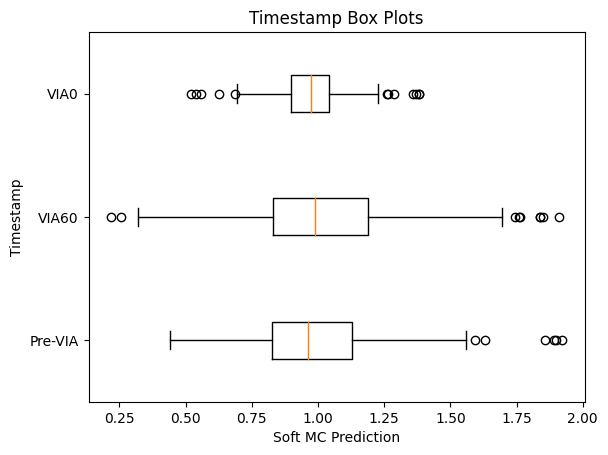

In [5]:
# Box plots

previa_soft_mc_pred = list(df_previa['soft_mc_prediction'])
via60_soft_mc_pred = list(df_via60['soft_mc_prediction'])
via0_soft_mc_pred = list(df_via0['soft_mc_prediction'])

# for dataset in [previa_soft_mc_pred, via60_soft_mc_pred, via0_soft_mc_pred]:
#     plt.scatter(dataset, range(len(dataset)))
#     plt.show()

# Plot the multiple box plots
plt.boxplot([previa_soft_mc_pred, via60_soft_mc_pred, via0_soft_mc_pred], labels=['Pre-VIA', 'VIA60', 'VIA0'], vert=False)

# Add title and labels
plt.title("Timestamp Box Plots")
plt.xlabel("Soft MC Prediction")
plt.ylabel("Timestamp")

# Show the plot
plt.show()

### Statistical Analysis

In [6]:
# Statistical Analysis

datasets = [previa_soft_mc_pred, via60_soft_mc_pred, via0_soft_mc_pred]
datasets_names = ['Pre-VIA', 'VIA60', 'VIA0']

for i in range(len(datasets)):
    print(f'Mean and std for {datasets_names[i]}: {round(np.mean(datasets[i]),3)} {round(np.std(datasets[i]),3)}')

# Create all permutations of two members
permutations_two = list(combinations(datasets, 2))
permutations_two_names = list(combinations(datasets_names, 2))

print('\n')
print("It seems as if the datasets might have the same means but different variances, so we are going to do Welch's t-test because it does not assume equal variances")
# Perform Welch's t-test
for i in range(len(permutations_two)):
    t_statistic, p_value = stats.ttest_ind(permutations_two[i][0], permutations_two[i][1], equal_var=False)
    print(f"Statistic and p-value for Welche's t-test between {permutations_two_names[i][0], permutations_two_names[i][1]}: {np.round(t_statistic, 3), np.round(p_value,3)}")

print('\n')
print("We are now going to do Leven's test to determine if the variances are any different")
# Levene's test
for i in range(len(permutations_two)):
    l_statistic, p_value = stats.levene(permutations_two[i][0], permutations_two[i][1])
    print(f"Statistic and p-value for Leven's's t-test between {permutations_two_names[i][0], permutations_two_names[i][1]}: {np.round(l_statistic, 3), np.round(p_value,3)}")

Mean and std for Pre-VIA: 1.011 0.276
Mean and std for VIA60: 1.018 0.317
Mean and std for VIA0: 0.969 0.175


It seems as if the datasets might have the same means but different variances, so we are going to do Welch's t-test because it does not assume equal variances
Statistic and p-value for Welche's t-test between ('Pre-VIA', 'VIA60'): (-0.213, 0.831)
Statistic and p-value for Welche's t-test between ('Pre-VIA', 'VIA0'): (1.414, 0.159)
Statistic and p-value for Welche's t-test between ('VIA60', 'VIA0'): (1.512, 0.132)


We are now going to do Leven's test to determine if the variances are any different
Statistic and p-value for Leven's's t-test between ('Pre-VIA', 'VIA60'): (1.485, 0.224)
Statistic and p-value for Leven's's t-test between ('Pre-VIA', 'VIA0'): (10.087, 0.002)
Statistic and p-value for Leven's's t-test between ('VIA60', 'VIA0'): (15.766, 0.0)


### Per-Patient Basis

In [7]:
# Per-Patient Basis

# Getting unique images names
image_names = list(df_dr['MASKED_IMG_ID'])
image_names = [name.split('.')[0].split(' ') for name in image_names]
image_names = list(np.unique([name[0] + ' ' + name[1] for name in image_names]))

pre_via_averages = []
via0_averages = []
via60_averages = []

# Average of Soft MC Prediction for each unique name
for i in range(len(image_names)):
    name_ex = image_names[i]
    subset_df = df_dr[df_dr['MASKED_IMG_ID'].str.contains(name_ex)]

    pre_via_subset = subset_df[subset_df['raw_via'] == 'Pre-VIA']['soft_mc_prediction']
    if len(pre_via_subset) == 0:
        pre_via_subset_avg = None
    else:
        pre_via_subset_avg = np.average(pre_via_subset)
    pre_via_averages.append(pre_via_subset_avg)

    via0_subset = subset_df[subset_df['raw_via'] == 'VIA0']['soft_mc_prediction']
    if len(via0_subset) == 0:
        via0_subset_avg = None
    else:
        via0_subset_avg = np.average(via0_subset)
    via0_averages.append(via0_subset_avg)

    via60_subset = subset_df[subset_df['raw_via'] == 'VIA60']['soft_mc_prediction']
    if len(via60_subset) == 0:
        via60_subset_avg = None
    else:
        via60_subset_avg = np.average(via60_subset)
    via60_averages.append(via60_subset_avg)

averages_dict = {'Pre-VIA':pre_via_averages, 'VIA0': via0_averages, 'VIA60': via60_averages}
average_df = pd.DataFrame(averages_dict)

combinations_two = list(combinations(average_df.columns, 2))

for comb in combinations_two:
    subset_df = average_df[list(comb)]
    subset_df = subset_df.dropna(how='any')
    timepoint_1 = subset_df.iloc[:, 0]
    timepoint_2 = subset_df.iloc[:, 1]
    # Perform paired sample t-test
    t_statistic, p_value = stats.ttest_rel(timepoint_1, timepoint_2)
    print(f'{comb}, t_statistic: {t_statistic}, p_value {p_value}')


('Pre-VIA', 'VIA0'), t_statistic: -0.02631620313293526, p_value 0.9792946962744697
('Pre-VIA', 'VIA60'), t_statistic: -0.23031869623967588, p_value 0.8192243267296142
('VIA0', 'VIA60'), t_statistic: -0.7667807125664783, p_value 0.4531521308942501


## Cambodia

In [16]:
# Getting our dataframes

df_previa = df_cam[df_cam['raw_via'] == 'Pre-VIA']
df_via60 = df_cam[df_cam['raw_via'] == 'VIA60']
df_via0 = df_cam[df_cam['raw_via'] == 'VIA0']

pred_mc_class = df_cam['predicted_mc_class']
vals, counts = np.unique(pred_mc_class, return_counts=True)
print(vals, 100*counts/np.sum(counts))

[0 1 2] [ 7.43801653 68.59504132 23.96694215]


### Box Plots

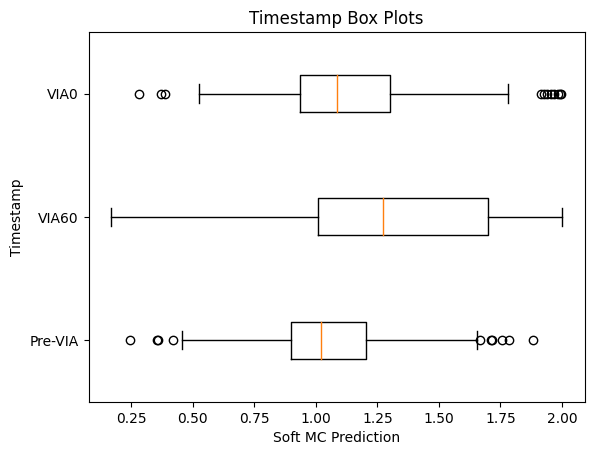

In [ ]:
# Box plots

previa_soft_mc_pred = list(df_previa['soft_mc_prediction'])
via60_soft_mc_pred = list(df_via60['soft_mc_prediction'])
via0_soft_mc_pred = list(df_via0['soft_mc_prediction'])

# for dataset in [previa_soft_mc_pred, via60_soft_mc_pred, via0_soft_mc_pred]:
#     plt.scatter(dataset, range(len(dataset)))
#     plt.show()

# Plot the multiple box plots
plt.boxplot([previa_soft_mc_pred, via60_soft_mc_pred, via0_soft_mc_pred], labels=['Pre-VIA', 'VIA60', 'VIA0'], vert=False)

# Add title and labels
plt.title("Timestamp Box Plots")
plt.xlabel("Soft MC Prediction")
plt.ylabel("Timestamp")

# Show the plot
plt.show()

### Statistical Analysis

In [ ]:
# Statistical Analysis

datasets = [previa_soft_mc_pred, via60_soft_mc_pred, via0_soft_mc_pred]
datasets_names = ['Pre-VIA', 'VIA60', 'VIA0']

for i in range(len(datasets)):
    print(f'Mean and std for {datasets_names[i]}: {round(np.mean(datasets[i]),3)} {round(np.std(datasets[i]),3)}')

# Create all permutations of two members
permutations_two = list(combinations(datasets, 2))
permutations_two_names = list(combinations(datasets_names, 2))

print('\n')
print("It seems as if the datasets might have the same means but different variances, so we are going to do Welch's t-test because it does not assume equal variances")
# Perform Welch's t-test
for i in range(len(permutations_two)):
    t_statistic, p_value = stats.ttest_ind(permutations_two[i][0], permutations_two[i][1], equal_var=False)
    print(f"Statistic and p-value for Welche's t-test between {permutations_two_names[i][0], permutations_two_names[i][1]}: {np.round(t_statistic, 3), np.round(p_value,3)}")

print('\n')
print("We are now going to do Leven's test to determine if the variances are any different")
# Levene's test
for i in range(len(permutations_two)):
    l_statistic, p_value = stats.levene(permutations_two[i][0], permutations_two[i][1])
    print(f"Statistic and p-value for Leven's's t-test between {permutations_two_names[i][0], permutations_two_names[i][1]}: {np.round(l_statistic, 3), np.round(p_value,3)}")

Mean and std for Pre-VIA: 1.062 0.357
Mean and std for VIA60: 1.297 0.477
Mean and std for VIA0: 1.145 0.417


It seems as if the datasets might have the same means but different variances, so we are going to do Welch's t-test because it does not assume equal variances
Statistic and p-value for Welche's t-test between ('Pre-VIA', 'VIA60'): (-3.534, 0.001)
Statistic and p-value for Welche's t-test between ('Pre-VIA', 'VIA0'): (-1.268, 0.207)
Statistic and p-value for Welche's t-test between ('VIA60', 'VIA0'): (2.052, 0.042)


We are now going to do Leven's test to determine if the variances are any different
Statistic and p-value for Leven's's t-test between ('Pre-VIA', 'VIA60'): (8.919, 0.003)
Statistic and p-value for Leven's's t-test between ('Pre-VIA', 'VIA0'): (1.272, 0.261)
Statistic and p-value for Leven's's t-test between ('VIA60', 'VIA0'): (2.555, 0.112)


## Per-Patient Basis

In [ ]:
# Per-Patient Basis

# Getting unique images names
image_names = list(df_cam['image'])
image_names = [name.split('.')[0].split(' ') for name in image_names]
image_names = list(np.unique([name[0] + ' ' + name[1] for name in image_names]))

pre_via_averages = []
via0_averages = []
via60_averages = []

# Average of Soft MC Prediction for each unique name
for i in range(len(image_names)):
    name_ex = image_names[i]
    subset_df = df_cam[df_cam['image'].str.contains(name_ex)]

    pre_via_subset = subset_df[subset_df['raw_via'] == 'Pre-VIA']['soft_mc_prediction']
    if len(pre_via_subset) == 0:
        pre_via_subset_avg = None
    else:
        pre_via_subset_avg = np.average(pre_via_subset)
    pre_via_averages.append(pre_via_subset_avg)

    via0_subset = subset_df[subset_df['raw_via'] == 'VIA0']['soft_mc_prediction']
    if len(via0_subset) == 0:
        via0_subset_avg = None
    else:
        via0_subset_avg = np.average(via0_subset)
    via0_averages.append(via0_subset_avg)

    via60_subset = subset_df[subset_df['raw_via'] == 'VIA60']['soft_mc_prediction']
    if len(via60_subset) == 0:
        via60_subset_avg = None
    else:
        via60_subset_avg = np.average(via60_subset)
    via60_averages.append(via60_subset_avg)

averages_dict = {'Pre-VIA':pre_via_averages, 'VIA0': via0_averages, 'VIA60': via60_averages}
average_df = pd.DataFrame(averages_dict)

combinations_two = list(combinations(average_df.columns, 2))

for comb in combinations_two:
    subset_df = average_df[list(comb)]
    subset_df = subset_df.dropna(how='any')
    timepoint_1 = subset_df.iloc[:, 0]
    timepoint_2 = subset_df.iloc[:, 1]
    # Perform paired sample t-test
    t_statistic, p_value = stats.ttest_rel(timepoint_1, timepoint_2)
    print(f'{comb}, t_statistic: {t_statistic}, p_value {p_value}')


('Pre-VIA', 'VIA0'), t_statistic: -1.5362050192430732, p_value 0.13463299407875454
('Pre-VIA', 'VIA60'), t_statistic: -3.086419312244486, p_value 0.004331653992631624
('VIA0', 'VIA60'), t_statistic: -2.3651841779936373, p_value 0.024683970694354736


# Comparison with Rakin's Model

## AUC and Confusion Matrix for ImageNet trained ViTMAE

In [27]:
validation_csv_path = '/sddata/projects/Cervical_Cancer_Projects/predictions/full_dataset_training_vitmae_huge_unfinetuned/predictions_validation.csv'
validation_csv = pd.read_csv(validation_csv_path)
print(validation_csv.columns)
testing_csv_path = '/sddata/projects/Cervical_Cancer_Projects/predictions/full_dataset_training_vitmae_huge_unfinetuned/predictions.csv'
testing_csv = pd.read_csv(testing_csv_path)
print(testing_csv.columns)

testing_ground_truths_csv_path = '/sddata/projects/Cervical_Cancer_Projects/data/model_36_split_df_all_gt.csv'
testing_ground_truths_csv = pd.read_csv(testing_ground_truths_csv_path)
testing_ground_truths_csv = testing_ground_truths_csv[testing_ground_truths_csv['dataset'] == 'test']
print(testing_ground_truths_csv.columns)

Index(['Unnamed: 0', 'MASKED_IMG_ID', 'STUDY', 'ID', 'CC_ST', 'MATCH_SET',
       'x1', 'x2', 'y1', 'y2', 'dataset', 'pred', 'mc_epistemic_0',
       'mc_epistemic_1', 'mc_epistemic_2', 'mc_epistemic_3', 'mc_epistemic_4',
       'mc_epistemic_5', 'mc_epistemic_6', 'mc_epistemic_7', 'mc_epistemic_8',
       'mc_epistemic_9', 'mc_epistemic_10', 'mc_epistemic_11',
       'mc_epistemic_12', 'mc_epistemic_13', 'mc_epistemic_14',
       'mc_epistemic_15', 'mc_epistemic_16', 'mc_epistemic_17',
       'mc_epistemic_18', 'mc_epistemic_19', 'mc_epistemic_20',
       'mc_epistemic_21', 'mc_epistemic_22', 'mc_epistemic_23',
       'mc_epistemic_24', 'mc_epistemic_25', 'mc_epistemic_26',
       'mc_epistemic_27', 'mc_epistemic_28', 'mc_epistemic_29',
       'mc_epistemic_30', 'mc_epistemic_31', 'mc_epistemic_32',
       'mc_epistemic_33', 'mc_epistemic_34', 'mc_epistemic_35',
       'mc_epistemic_36', 'mc_epistemic_37', 'mc_epistemic_38',
       'mc_epistemic_39', 'mc_epistemic_40', 'mc_epistemic_4

In [28]:
# Plotting Functions

## Imports
import ast
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

## Plotting AUC-ROC
def plot_auc_roc(y_true, y_scores, title):

    n_classes = len(np.unique(y_true))

    # Binarize true labels for each class
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    y_scores = np.array(y_scores)

    # Initialize variables to store ROC curves and AUC scores
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calculate ROC curves and AUC-ROC scores for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = cycle(['darkorange', 'cornflowerblue', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

## Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):

    n_classes = len(np.unique(y_true))
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=[f'Class {i}' for i in range(n_classes)],
                yticklabels=[f'Class {i}' for i in range(n_classes)])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

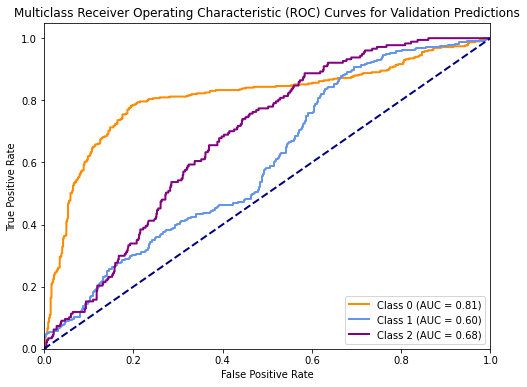

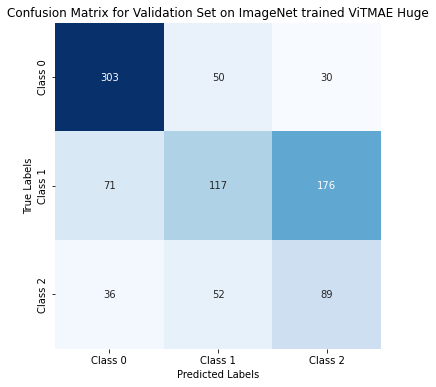

In [29]:
# AUC-ROC and Confusion Matrix for Validation Data

ground_truth_val = [int(value) for value in validation_csv['CC_ST']]
prediction_mc_probs_val = [ast.literal_eval(value) for value in validation_csv['pred_mc']]
prediction_val = [int(value) for value in validation_csv['predicted_class']]

plot_auc_roc(ground_truth_val, prediction_mc_probs_val, 'Multiclass Receiver Operating Characteristic (ROC) Curves for Validation Predictions')
plot_confusion_matrix(ground_truth_val, prediction_val, 'Confusion Matrix for Validation Set on ImageNet trained ViTMAE Huge')

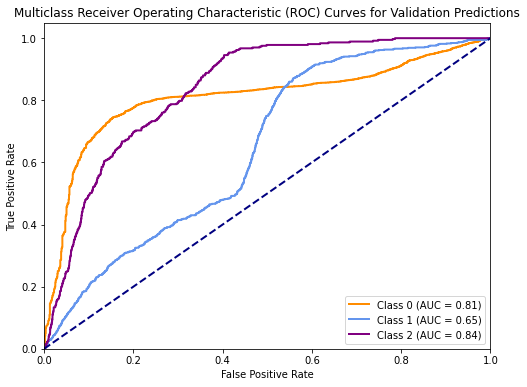

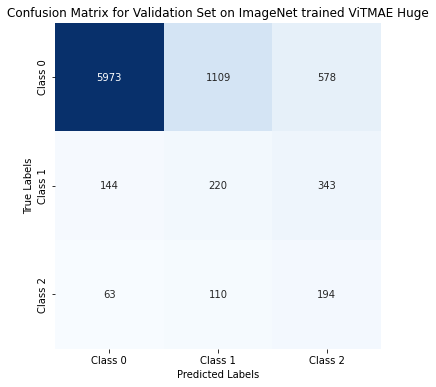

In [30]:
# AUC-ROC and Confusion Matrix for Testing Data

ground_truth_val = [int(value) for value in testing_ground_truths_csv['CC_ST']]
prediction_mc_probs_val = [ast.literal_eval(value) for value in testing_csv['pred_mc']]
prediction_val = [int(value) for value in testing_csv['predicted_class']]

plot_auc_roc(ground_truth_val, prediction_mc_probs_val, 'Multiclass Receiver Operating Characteristic (ROC) Curves for Validation Predictions')
plot_confusion_matrix(ground_truth_val, prediction_val, 'Confusion Matrix for Validation Set on ImageNet trained ViTMAE Huge')